In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [3]:
#train dataset
train = pd.read_csv('C:/Users/This PC/TitanicPrediction/train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


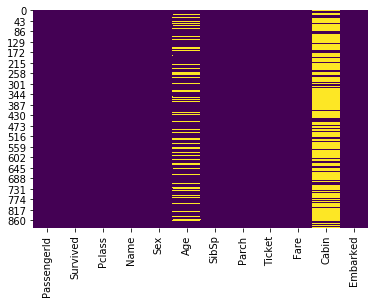

In [5]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

In [6]:
sns.set_style('whitegrid')

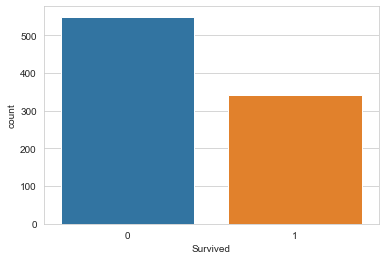

In [7]:
sns.countplot(x='Survived',data=train)

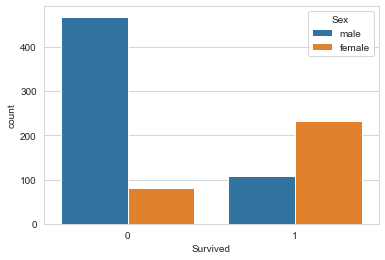

In [8]:
sns.countplot(x='Survived',hue='Sex',data=train)

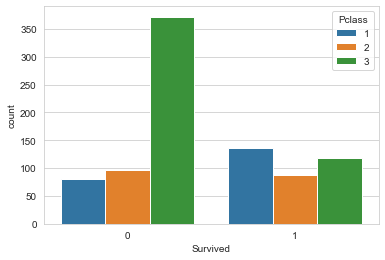

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=train)

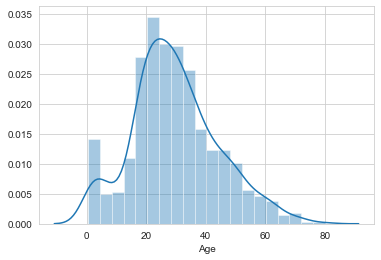

In [10]:
sns.distplot(train['Age'].dropna(),kde=True,bins=20)

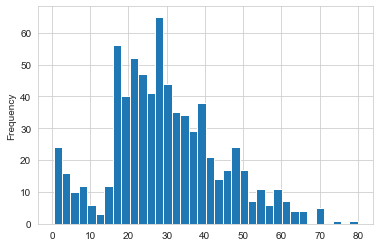

In [11]:
train['Age'].plot.hist(bins=36)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


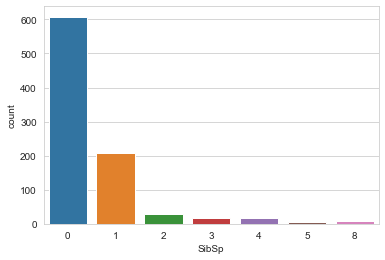

In [13]:
sns.countplot(x='SibSp',data=train)
#sns.countplot(x='Survived',hue='SibSp',data=train)

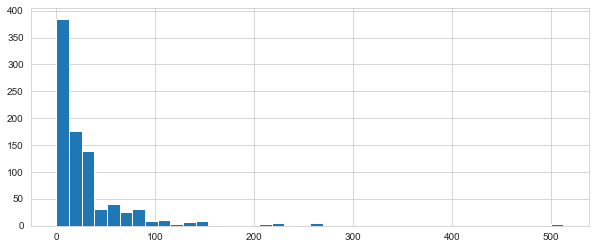

In [14]:
train['Fare'].hist(bins=40,figsize=(10,4))

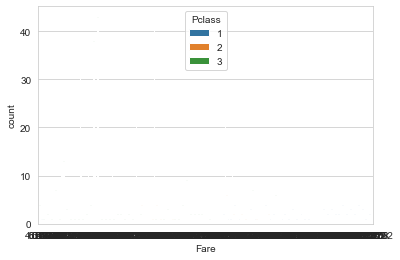

In [15]:
sns.countplot(x='Fare',hue='Pclass',data=train)

In [16]:
import cufflinks as cf

In [17]:
cf.go_offline()

In [18]:
train['Fare'].iplot(kind='hist',bins=50)

In [19]:
train['Age'].mean()

29.69911764705882

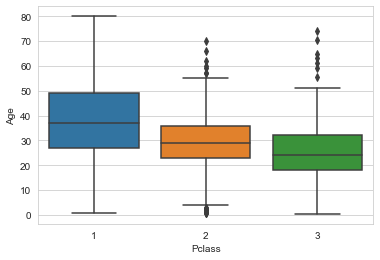

In [20]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [21]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass== 2:
            return 29
        else:
            return 24
    else:
        return Age

In [22]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

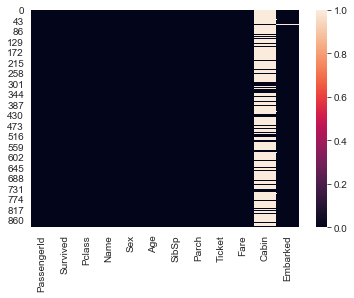

In [23]:
sns.heatmap(train.isnull())

In [24]:
train.drop('Cabin',axis=1,inplace=True)

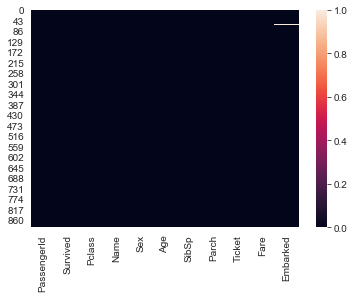

In [25]:
sns.heatmap(train.isnull())

In [26]:
train.dropna(inplace=True)

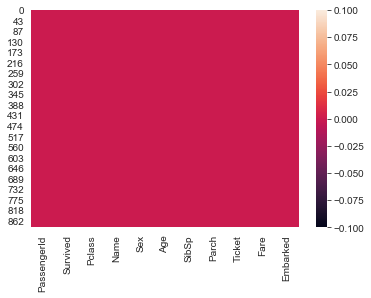

In [27]:
sns.heatmap(train.isnull())

In [28]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [29]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [30]:
train=pd.concat([train,sex,embark],axis=1)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [33]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [34]:
train.drop('PassengerId',axis=1,inplace=True)

In [35]:
 train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [36]:
x=train.drop("Survived",axis=1)
y=train['Survived']

In [1]:
from sklearn.model_selection import train_test_split

In [254]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [255]:
#By:- Logistic Regression
from sklearn.linear_model import LogisticRegression

In [256]:
logmodel=LogisticRegression()

In [257]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [258]:
predictios=logmodel.predict(X_test)

In [259]:
from sklearn.metrics import classification_report

In [260]:
print(classification_report(y_test,predictios))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [261]:
from sklearn.metrics import confusion_matrix

In [262]:
confusion_matrix(y_test,predictios)

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [263]:
from sklearn.metrics import accuracy_score

In [267]:
accuracy_score(y_test,predictios)*100

80.89887640449437

In [265]:
#test dataset
test_dataSet = pd.read_csv('C:/Users/This PC/Downloads/test.csv')

In [266]:
test_dataSet.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


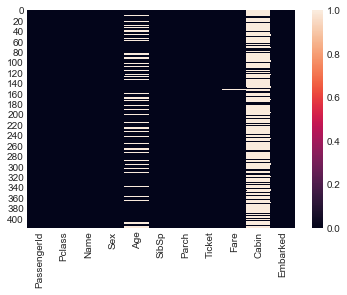

In [268]:
sns.heatmap(test_dataSet.isnull())

In [269]:
test_dataSet['Age']=test_dataSet[['Age','Pclass']].apply(impute_age,axis=1)

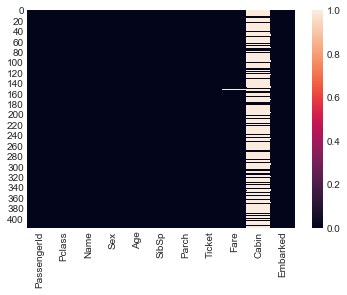

In [270]:
sns.heatmap(test_dataSet.isnull())

In [271]:
test_dataSet.drop('Cabin',axis=1,inplace=True)

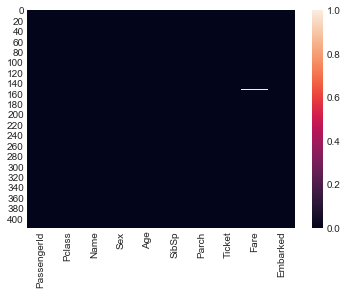

In [272]:
sns.heatmap(test_dataSet.isnull())

In [273]:
test_dataSet.dropna(inplace=True)

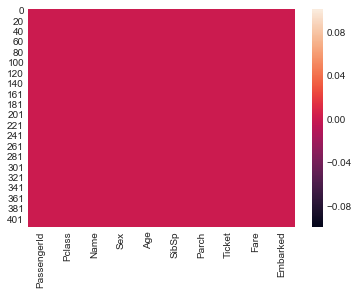

In [274]:
sns.heatmap(test_dataSet.isnull())

In [275]:
test_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    417 non-null int64
Pclass         417 non-null int64
Name           417 non-null object
Sex            417 non-null object
Age            417 non-null float64
SibSp          417 non-null int64
Parch          417 non-null int64
Ticket         417 non-null object
Fare           417 non-null float64
Embarked       417 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [276]:
test_dataSet.drop(['Name','PassengerId'],axis=1,inplace=True)

In [277]:
sex=pd.get_dummies(test_dataSet['Sex'],drop_first=True)

In [278]:
embark=pd.get_dummies(test_dataSet['Embarked'],drop_first=True)

In [279]:
test_dataSet=pd.concat([test_dataSet,sex,embark],axis=1)

In [280]:
test_dataSet.drop(['Sex','Embarked','Ticket'],axis=1,inplace=True)

In [281]:
test_dataSet.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [282]:
predicts=logmodel.predict(test_dataSet)

In [283]:
df = pd.DataFrame({'Survived':predicts})

In [284]:
test_dataSet=pd.concat([test_dataSet,df],axis=1)

In [285]:
test_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      417 non-null float64
Age         417 non-null float64
SibSp       417 non-null float64
Parch       417 non-null float64
Fare        417 non-null float64
male        417 non-null float64
Q           417 non-null float64
S           417 non-null float64
Survived    417 non-null float64
dtypes: float64(9)
memory usage: 32.7 KB


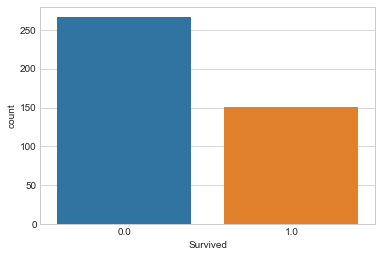

In [286]:
#Analyzing the test data set
sns.countplot(x='Survived',data=test_dataSet)

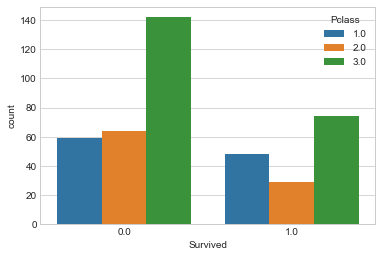

In [287]:
sns.countplot(x='Survived',hue='Pclass',data=test_dataSet)

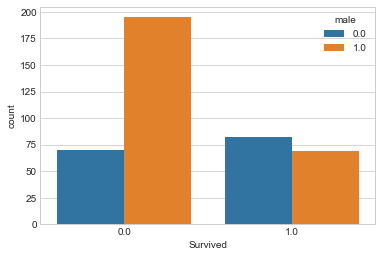

In [288]:
sns.countplot(x='Survived',hue='male',data=test_dataSet)